# Relatório Científico - NeuroPasso
Este notebook realiza a análise dos dados coletados pelo sistema NeuroPasso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sqlite3
from datetime import datetime

# Configuração dos Gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

## 1. Carregar Dados do Banco de Dados

In [2]:
# Conectar ao banco de dados SQLite
db_path = '../backend/clinic.db'
conn = sqlite3.connect(db_path)

# Carregar Pacientes
df_patients = pd.read_sql_query("SELECT * FROM patients", conn)
print("Pacientes:")
display(df_patients)

# Carregar Sessões
df_sessions = pd.read_sql_query("SELECT * FROM sessions", conn)
print("\nSessões:")
display(df_sessions.head())

Pacientes:


,id,name,created_at
0,1,Thomaz,2025-11-30 15:36:26.412010
1,2,Sergio,2025-11-30 16:47:21.087982



Sessões:


,id,patient_id,timestamp,duration_seconds,max_angle_esq,max_angle_dir,avg_emg_esq,avg_emg_dir,raw_data_blob
0,1,1,2025-11-30 15:51:13.171539,10.0,0.0,68.96,0.0,0.0,"[{""time"":""12:51:12 PM"",""DIR_angle"":68.9,""DIR_e..."
1,2,1,2025-11-30 15:51:41.198376,10.0,0.0,64.77,0.0,0.0,"[{""time"":""12:51:40 PM"",""DIR_angle"":62.71,""DIR_..."
2,3,1,2025-11-30 15:57:50.980027,10.0,0.0,68.68,0.0,0.0,"[{""time"":""12:57:45 PM"",""DIR_angle"":68.52,""DIR_..."
3,4,1,2025-11-30 15:58:27.098022,10.0,0.0,68.90,0.0,0.0,"[{""time"":""12:58:26 PM"",""DIR_angle"":68.69,""DIR_..."
4,5,1,2025-11-30 16:08:10.094875,10.0,0.0,69.10,0.0,0.0,"[{""time"":""1:08:09 PM"",""DIR_angle"":69.09,""DIR_e..."


## 2. Análise de Evolução (Ângulo Máximo)

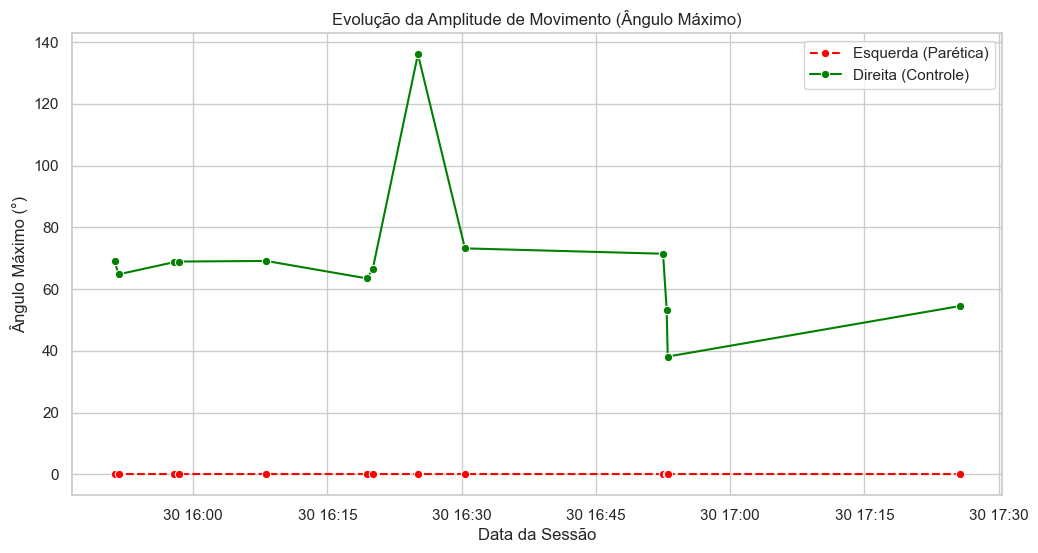

In [3]:
# Converter timestamp para datetime
df_sessions['timestamp'] = pd.to_datetime(df_sessions['timestamp'])

# Plotar Evolução
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sessions, x='timestamp', y='max_angle_esq', label='Esquerda (Parética)', marker='o', linestyle='--', color='red')
sns.lineplot(data=df_sessions, x='timestamp', y='max_angle_dir', label='Direita (Controle)', marker='o', color='green')

plt.title('Evolução da Amplitude de Movimento (Ângulo Máximo)')
plt.xlabel('Data da Sessão')
plt.ylabel('Ângulo Máximo (°)')
plt.legend()
plt.show()

## 3. Análise Detalhada de uma Sessão (Séries Temporais)

In [4]:
# Escolher a última sessão
if not df_sessions.empty:
    last_session = df_sessions.iloc[-1]
    raw_data = json.loads(last_session['raw_data_blob'])
    df_raw = pd.DataFrame(raw_data)

    # Criar eixo de tempo (assumindo 10Hz - 0.1s por amostra)
    df_raw['time_sec'] = df_raw.index * 0.1

    # Plotar Ângulo vs Tempo
    plt.figure(figsize=(14, 6))
    plt.plot(df_raw['time_sec'], df_raw['ESQ_angle'], label='Esquerda (Parética)', linestyle='--', color='red')
    plt.plot(df_raw['time_sec'], df_raw['DIR_angle'], label='Direita (Controle)', color='green')
    plt.title(f"Cinemática da Sessão {last_session['id']} - {last_session['timestamp']}")
    plt.xlabel('Tempo (s)')
    plt.ylabel('Ângulo (°)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Nenhuma sessão encontrada.")

KeyError: 'ESQ_angle'

<Figure size 1400x600 with 0 Axes>

## 4. Comparação de Ativação Muscular (Boxplot)

In [ ]:
if not df_sessions.empty:
    # Preparar dados para Boxplot (Melt)
    df_melted = df_sessions.melt(id_vars=['id', 'timestamp'], value_vars=['avg_emg_esq', 'avg_emg_dir'], var_name='Leg', value_name='Avg_Activation')
    df_melted['Leg'] = df_melted['Leg'].map({'avg_emg_esq': 'Esquerda (Parética)', 'avg_emg_dir': 'Direita (Controle)'})

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_melted, x='Leg', y='Avg_Activation', palette={'Esquerda (Parética)': 'red', 'Direita (Controle)': 'green'})
    plt.title('Distribuição da Ativação Muscular Média por Perna')
    plt.ylabel('Ativação Média (0-4095)')
    plt.show()
else:
    print("Nenhuma sessão encontrada.")